# Library import

In [2]:
import os
from os.path import join

import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data load

In [5]:
df = pd.read_pickle("/content/drive/Shareddrives/TNT/정규세션/2022년 1학기/산업 인공지능/TASK2-wafer map /LSWMD.pkl")

In [7]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [ ]:
df['waferMap'][0].shape

(45, 48)

# Check list



*   데이터 설명
*   예측해야 하는 target 값의 분포
*   결측치 이상치 판단
*   분류상 유의미한 데이터인지 판단



# data summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [ ]:
df.describe()

,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


In [ ]:
df.shape

(811457, 6)

In [ ]:
idx=0
df['failureType'][idx].type

AttributeError: ignored

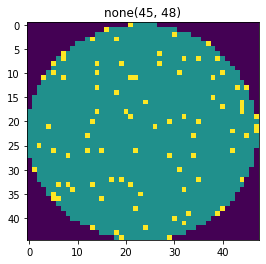

In [ ]:
idx=0
img=df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+str(img.shape))
plt.imshow(img)

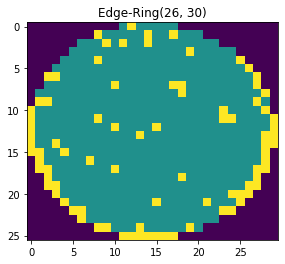

In [ ]:
idx=811454
img=df['waferMap'][idx]
plt.title(df['failureType'][idx][0][0]+str(img.shape))
plt.imshow(img)

In [ ]:
df['waferMap'][0] #column='waferMap'의 valuesms array형태이다.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
def giveshape(array):
  return array.shape
df['waferSize']=df['waferMap'].apply(giveshape)

In [37]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferSize
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none,"(45, 48)"


In [38]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferSize
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring,"(26, 30)"
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc,"(26, 30)"
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring,"(26, 30)"
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,None,None,"(26, 30)"
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,None,None,"(26, 30)"


In [ ]:
df['lotName'].value_counts()

lot1        25
lot26113    25
lot26129    25
lot26125    25
lot26124    25
            ..
lot9377      1
lot33363     1
lot33362     1
lot33337     1
lot31847     1
Name: lotName, Length: 46293, dtype: int64

In [ ]:
df['lotName'].value_counts().value_counts() #대부분의 lot은 25개 wafer로 가득차있다.

25    21762
1      3461
12     3032
24     2659
13     1960
9      1404
5      1279
2      1255
10     1077
7      1053
23      991
3       853
4       737
11      682
6       634
22      602
8       560
18      419
21      391
20      336
17      260
16      248
15      246
19      243
14      149
Name: lotName, dtype: int64

In [ ]:
df['lotName'].unique()

array(['lot1', 'lot2', 'lot3', ..., 'lot47541', 'lot47542', 'lot47543'],
      dtype=object)

In [ ]:
df['waferIndex'].value_counts() #비교적 균등하게 분포

6.0     32745
4.0     32714
5.0     32701
7.0     32672
2.0     32663
8.0     32650
11.0    32637
9.0     32636
3.0     32621
12.0    32598
10.0    32586
1.0     32516
13.0    32381
16.0    32362
14.0    32353
17.0    32333
18.0    32333
21.0    32320
22.0    32312
15.0    32301
20.0    32290
19.0    32285
23.0    32202
24.0    32197
25.0    32049
Name: waferIndex, dtype: int64

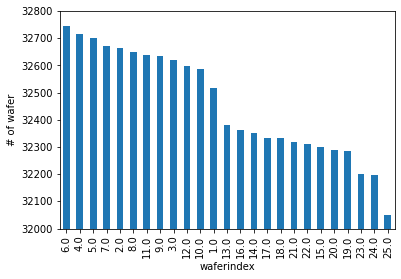

In [ ]:
df['waferIndex'].value_counts().plot.bar(ylim=(32000,32800),xlabel='waferindex',ylabel='# of wafer')

In [ ]:
df_lot=df.groupby('lotName')['waferIndex'].nunique() #1번부터 25번까지 가득차 있는 lot이 대부분
df_lot

lotName
lot1        25
lot10       25
lot100      25
lot10000     2
lot10001     2
            ..
lot9995     25
lot9996     25
lot9997     23
lot9998     23
lot9999     23
Name: waferIndex, Length: 46293, dtype: int64

In [39]:
df.drop(columns='waferIndex',inplace=True)

# failure Type 분석

In [8]:
df['failureType'][0]

array([['none']], dtype='<U4')

In [9]:
df['trianTestLabel'][0]

array([['Training']], dtype='<U8')

In [10]:
def removebrackets(array):
    if array.shape == (1, 1):
        return "".join(array[0])
    elif array.shape == (0, 0):
        return None
        
df['trianTestLabel'] = df['trianTestLabel'].apply(removebrackets)
df['failureType'] = df['failureType'].apply(removebrackets)

In [11]:
df[['trianTestLabel','failureType']]

,trianTestLabel,failureType
0,Training,none
1,Training,none
2,Training,none
3,Training,none
4,Training,none
...,...,...
811452,Test,Edge-Ring
811453,Test,Edge-Loc
811454,Test,Edge-Ring
811455,None,None


In [12]:
df['failureType'].isnull().sum()

638507

In [13]:
df['trianTestLabel'].isnull().sum()

638507

In [40]:
df_=df.dropna(axis='index',how='any')

In [41]:
df_.reset_index(inplace=True)
df_

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferSize
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
...,...,...,...,...,...,...,...
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)"
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"


In [16]:
df_['failureType'].value_counts()

none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: failureType, dtype: int64

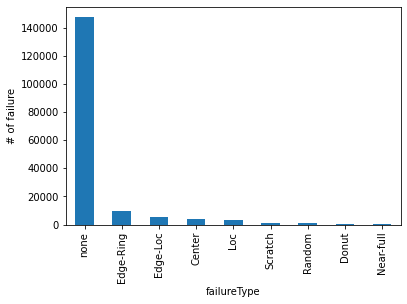

In [17]:
df_['failureType'].value_counts().plot.bar(xlabel='failureType',ylabel='# of failure')

In [42]:
df_none=df_[df_['failureType']=='none']
df_none.reset_index(inplace=True,)

In [43]:
df_none

,level_0,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferSize
0,0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
1,1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
2,2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
3,3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
4,4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
...,...,...,...,...,...,...,...,...
147426,172933,811438,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,none,"(26, 30)"
147427,172934,811439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,none,"(26, 30)"
147428,172937,811442,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,...",600.0,lot47542,Test,none,"(26, 30)"
147429,172940,811445,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,none,"(26, 30)"


In [44]:
df_fail=df_[df_['failureType']!='none']
df_fail.reset_index(inplace=True)

In [45]:
df_fail

,level_0,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferSize
0,19,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,Loc,"(45, 48)"
1,35,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)"
2,36,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)"
3,37,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)"
4,38,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)"
...,...,...,...,...,...,...,...,...
25514,172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"
25515,172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"
25516,172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)"
25517,172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)"


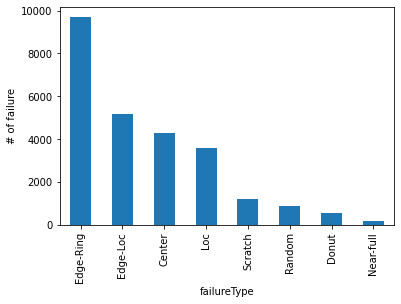

In [22]:
df_fail['failureType'].value_counts().plot.bar(xlabel='failureType',ylabel='# of failure')

In [46]:
a=df_['lotName'].value_counts()
i=0
for lotname in df_['lotName']:
   df_.loc[i,'howfilledlot']=a[lotname]
   i+=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [47]:
df_['howfilledlot'].value_counts()

25.0    110375
24.0     16728
23.0     11684
22.0      8514
21.0      6720
20.0      3540
1.0       2441
19.0      2071
18.0      1296
2.0       1038
17.0       833
16.0       720
15.0       720
3.0        702
6.0        630
14.0       602
4.0        600
5.0        555
12.0       516
13.0       507
7.0        490
8.0        480
9.0        423
11.0       385
10.0       380
Name: howfilledlot, dtype: int64

In [25]:
import seaborn as sns

In [48]:
df_['Is_fail']=df_['failureType']
mapping_type={'Center':1,'Donut':1,'Edge-Loc':1,'Edge-Ring':1,'Loc':1,'Random':1,'Scratch':1,'Near-full':1,'none':0}
df_=df_.replace({'Is_fail':mapping_type})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_

,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferSize,howfilledlot,Is_fail
0,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)",25.0,0
1,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)",25.0,0
2,2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)",25.0,0
3,3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)",25.0,0
4,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)",25.0,0
...,...,...,...,...,...,...,...,...,...
172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,1
172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,1
172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)",25.0,1
172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,1


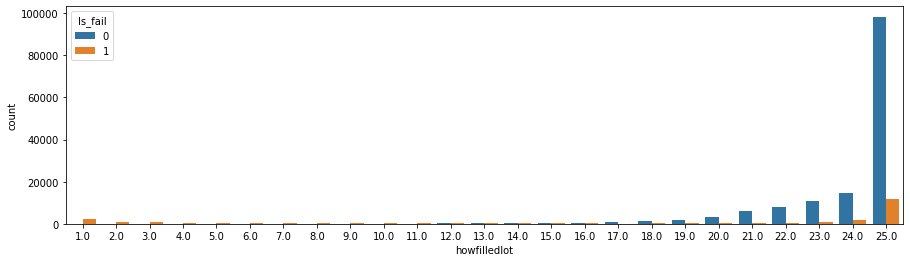

In [50]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_,x='howfilledlot',hue='Is_fail')

In [51]:
df_fail=df_[df_['failureType']!='none']
df_fail.reset_index(inplace=True)
df_fail

,level_0,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferSize,howfilledlot,Is_fail
0,19,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,Loc,"(45, 48)",25.0,1
1,35,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,1
2,36,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,1
3,37,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,1
4,38,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,1
...,...,...,...,...,...,...,...,...,...,...
25514,172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,1
25515,172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,1
25516,172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)",25.0,1
25517,172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,1


In [52]:
df_fail['howfilledlot'].value_counts()

25.0    11997
1.0      2433
24.0     1999
2.0      1036
23.0      706
3.0       693
6.0       612
22.0      604
4.0       596
5.0       550
7.0       470
8.0       463
21.0      451
9.0       392
12.0      342
10.0      297
13.0      276
11.0      261
15.0      249
20.0      224
16.0      216
14.0      211
19.0      195
18.0      159
17.0       87
Name: howfilledlot, dtype: int64

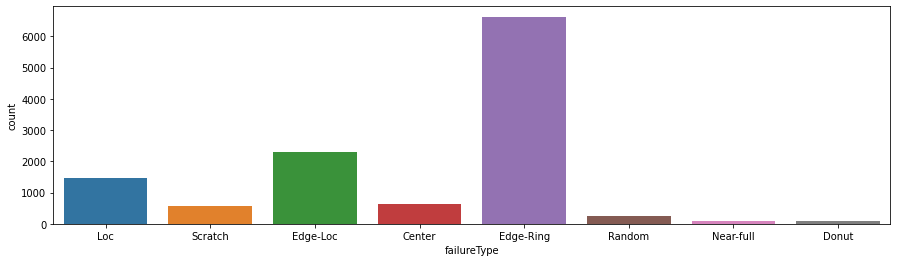

In [53]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_fail[df_fail['howfilledlot']==25],x='failureType')

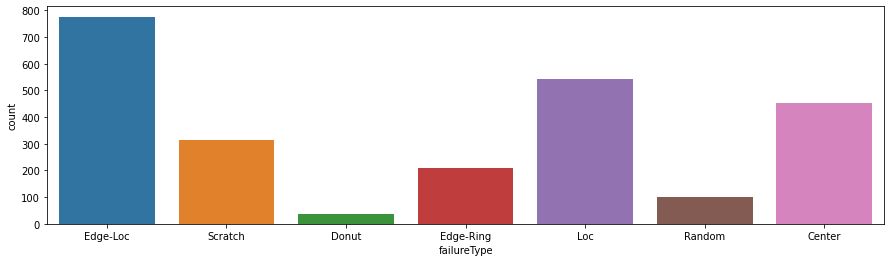

In [34]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_fail[df_fail['howfilledlot']==1],x='failureType')

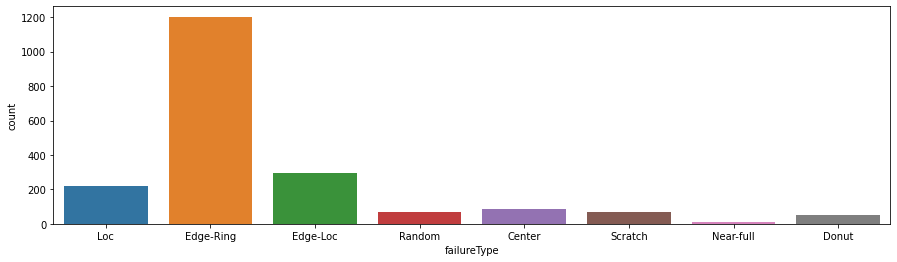

In [35]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_fail[df_fail['howfilledlot']==24],x='failureType')   #25와 유사한 점이 안보인다.  

In [57]:
df_check=df_[['dieSize','howfilledlot','Is_fail']]
df_corr=df_check.corr()
df_corr.style.background_gradient()

,dieSize,howfilledlot,Is_fail
dieSize,1.000000,-0.090591,0.281321
howfilledlot,-0.090591,1.000000,-0.482889
Is_fail,0.281321,-0.482889,1.000000


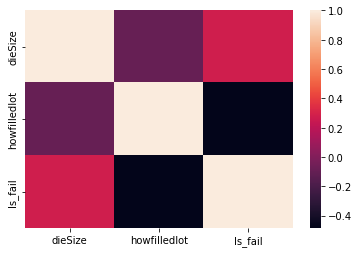

In [58]:
sns.heatmap(df_corr)

In [60]:
df_fail.drop(columns='Is_fail',inplace=True)
df_fail['failNum']=df_fail['failureType']
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7}
df_fail=df_fail.replace({'failNum':mapping_type})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df_fail

,level_0,index,waferMap,dieSize,lotName,trianTestLabel,failureType,waferSize,howfilledlot,failNum
0,19,19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,Loc,"(45, 48)",25.0,4
1,35,36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,2
2,36,37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,2
3,37,38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,2
4,38,39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,Training,Edge-Loc,"(53, 58)",23.0,2
...,...,...,...,...,...,...,...,...,...,...
25514,172945,811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,2
25515,172946,811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,2
25516,172947,811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,Test,Edge-Ring,"(26, 30)",25.0,3
25517,172948,811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,Test,Edge-Loc,"(26, 30)",25.0,2


In [62]:
df_check2=df_fail[['dieSize','howfilledlot','failNum']]
df_corr=df_check2.corr()
df_corr.style.background_gradient()

,dieSize,howfilledlot,failNum
dieSize,1.000000,0.015967,0.141569
howfilledlot,0.015967,1.000000,0.251207
failNum,0.141569,0.251207,1.000000


# Visualize

In [71]:
failname = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full','none']
for fail in failname:
  print(fail)

Center
Donut
Edge-Loc
Edge-Ring
Loc
Random
Scratch
Near-full
none


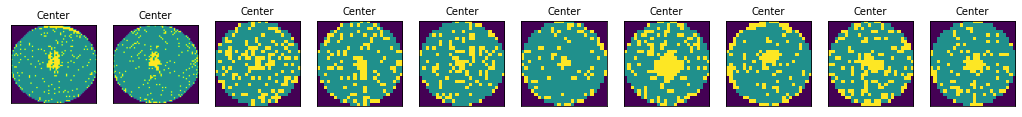

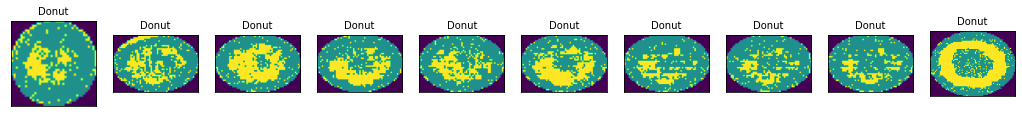

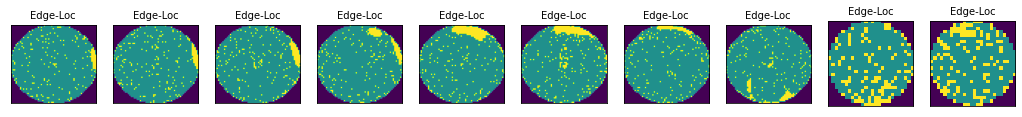

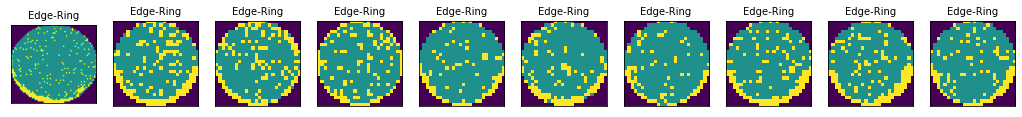

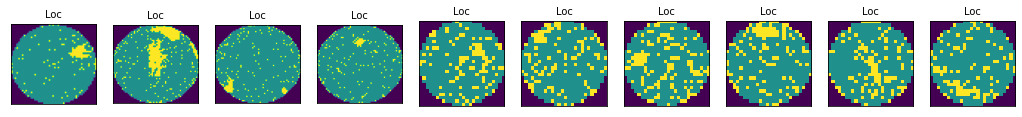

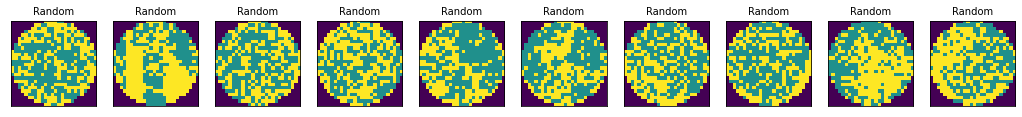

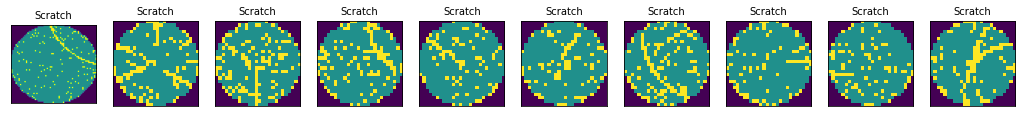

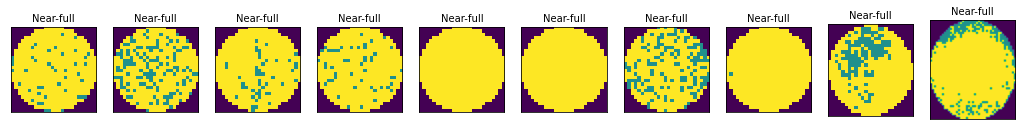

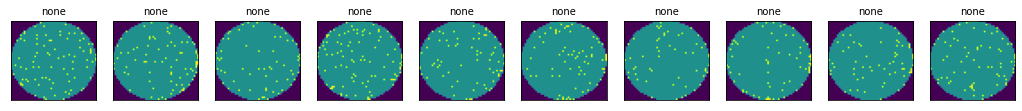

In [77]:
%matplotlib inline
failname = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full','none']


for fail in failname:
  fig,ax= plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
  #ax = ax.ravel(order='C')
  img=df_[df_['failureType']==fail]
  img.reset_index(inplace=True)
  for i in range(10):
    ax[i].imshow(img['waferMap'][i])
    ax[i].set_title(fail,fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.show()

# EDA

EDA(Exploratory Data Analysis, 탐색적 데이터 분석)을 통해 데이터가 어떠한 형태인지 살펴보세요!
ex) 열별로 데이터 종류, 개수세보기, 데이터 불균형 상태인지 막대그래프 그려보기, wafermap을 failureType별로 그려보기 등등..